In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Load CIFAR10 Data

In [ ]:
tensor_transform = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.CIFAR10(root = './data', train = True, download= True, transform = tensor_transform)
val_data = torchvision.datasets.CIFAR10(root = './data', train = False, download= True, transform= tensor_transform)
train_data, val_data

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ), Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [ ]:
classes = {0:'plane', 1: 'car', 2: 'bird', 3: 'cat', 4:'dog'}

In [ ]:
train_data[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size = 4, shuffle = True)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size = 4, shuffle = False)
train_itr = iter(train_dataloader)
images, labels = train_itr.next()

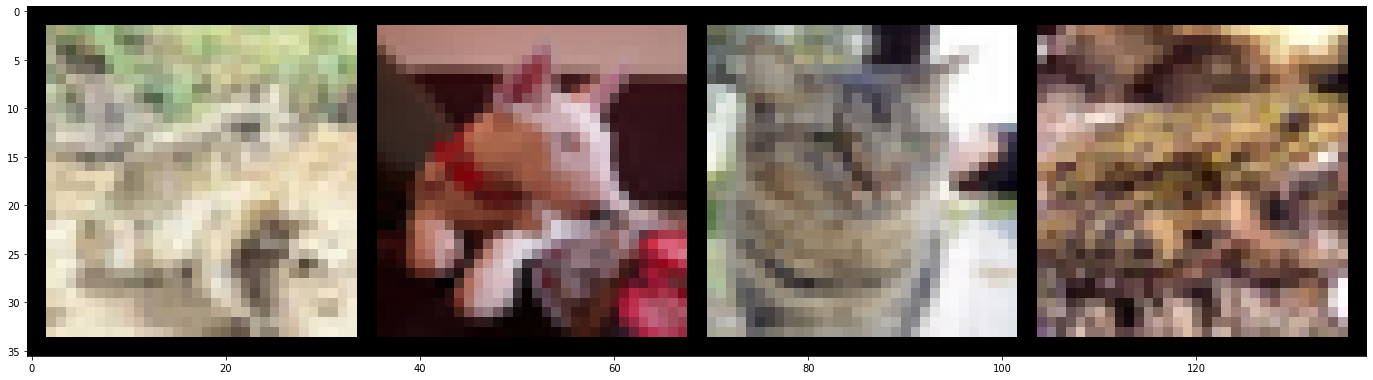

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

def imshow(image):
  np_img= image.numpy()
  plt.imshow(np.transpose(np_img, (1,2,0)))
  plt.show()

plt.figure(figsize= (24,12))
imshow(torchvision.utils.make_grid(images))

# Model

In [33]:
import torch.nn as nn
import torch.nn.functional as F 

class ImageClassifier(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.conv1= nn.Conv2d(3, 64, 5)
    self.conv2= nn.Conv2d(64, 128, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(128*5*5,120)
    self.fc2= nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x= F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.fc3(x)


# Training

In [34]:
import torch.optim as optim

classifier_model = ImageClassifier()
loss_function = nn.CrossEntropyLoss()
optimiser = optim.SGD(classifier_model.parameters(), lr= 0.001, momentum = 0.9)

In [35]:
for epoch in range(50):
  running_loss = 0.0
  for i, batch in enumerate(train_dataloader, 0):
    images,labels = batch
    optimiser.zero_grad()

    logits = classifier_model(images)
    loss = loss_function(logits, labels)
    loss.backward()
    optimiser.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f'[{epoch + 1}, {i+ 1.5}, loss {running_loss / 2000:.3f}]')
      running_loss = 0.0

print('Finished training')

[1, 2000.5, loss 2.212]
[1, 4000.5, loss 1.907]
[1, 6000.5, loss 1.737]
[1, 8000.5, loss 1.585]
[1, 10000.5, loss 1.489]
[1, 12000.5, loss 1.420]
[2, 2000.5, loss 1.324]
[2, 4000.5, loss 1.267]
[2, 6000.5, loss 1.247]
[2, 8000.5, loss 1.227]
[2, 10000.5, loss 1.164]
[2, 12000.5, loss 1.144]
[3, 2000.5, loss 1.035]
[3, 4000.5, loss 1.047]
[3, 6000.5, loss 1.027]
[3, 8000.5, loss 1.015]
[3, 10000.5, loss 0.992]
[3, 12000.5, loss 1.001]
[4, 2000.5, loss 0.837]
[4, 4000.5, loss 0.869]
[4, 6000.5, loss 0.858]
[4, 8000.5, loss 0.876]
[4, 10000.5, loss 0.858]
[4, 12000.5, loss 0.853]
[5, 2000.5, loss 0.716]
[5, 4000.5, loss 0.723]
[5, 6000.5, loss 0.711]
[5, 8000.5, loss 0.749]
[5, 10000.5, loss 0.753]
[5, 12000.5, loss 0.762]
[6, 2000.5, loss 0.595]
[6, 4000.5, loss 0.617]
[6, 6000.5, loss 0.650]
[6, 8000.5, loss 0.638]
[6, 10000.5, loss 0.647]
[6, 12000.5, loss 0.659]
[7, 2000.5, loss 0.480]
[7, 4000.5, loss 0.532]
[7, 6000.5, loss 0.556]
[7, 8000.5, loss 0.549]
[7, 10000.5, loss 0.547]
[7,

# Evaluation

In [36]:
correct = 0
total = 0

with torch.no_grad():
  for batch in val_dataloader:
    images,labels = batch
    logits = classifier_model(images)
    _, predicted = torch.max(logits.data, 1)
    total += labels.size(0)
    correct += (predicted ==labels).sum().item()

print(f'Accuracy over 10000 validationimages: {100* correct//total}%')

Accuracy over 10000 validationimages: 69%
